In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt , image as mpimg
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/gdrive/MyDrive/BD_project/archive/flights.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
print(df.head())

   YEAR  MONTH  DAY  ...  AIRLINE_DELAY LATE_AIRCRAFT_DELAY  WEATHER_DELAY
0  2015      1    1  ...            NaN                 NaN            NaN
1  2015      1    1  ...            NaN                 NaN            NaN
2  2015      1    1  ...            NaN                 NaN            NaN
3  2015      1    1  ...            NaN                 NaN            NaN
4  2015      1    1  ...            NaN                 NaN            NaN

[5 rows x 31 columns]


In [ ]:
 print(df.info()) 
 desc = df.describe() 
 print(desc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [ ]:
nullsum = df.isnull().sum()
print(nullsum)

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64


In [ ]:
df.columns
df.drop(["CANCELLATION_REASON", "AIR_SYSTEM_DELAY" ,"SECURITY_DELAY", "AIRLINE_DELAY", "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"], axis = 1, inplace = True)
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED'],
      dtype='object')

In [ ]:
df.dropna(inplace=True)
df = df[[col for col in df if df[col].nunique() > 1]]

In [ ]:
df.shape

(5714008, 22)

In [ ]:
nullsum1 = df.isnull().sum()
print(nullsum1)

MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
dtype: int64


In [ ]:
df.head

<bound method NDFrame.head of          MONTH  DAY  ...  ARRIVAL_TIME ARRIVAL_DELAY
0            1    1  ...         408.0         -22.0
1            1    1  ...         741.0          -9.0
2            1    1  ...         811.0           5.0
3            1    1  ...         756.0          -9.0
4            1    1  ...         259.0         -21.0
...        ...  ...  ...           ...           ...
5819074     12   31  ...         753.0         -26.0
5819075     12   31  ...         430.0         -16.0
5819076     12   31  ...         432.0          -8.0
5819077     12   31  ...         330.0         -10.0
5819078     12   31  ...         442.0           2.0

[5714008 rows x 22 columns]>

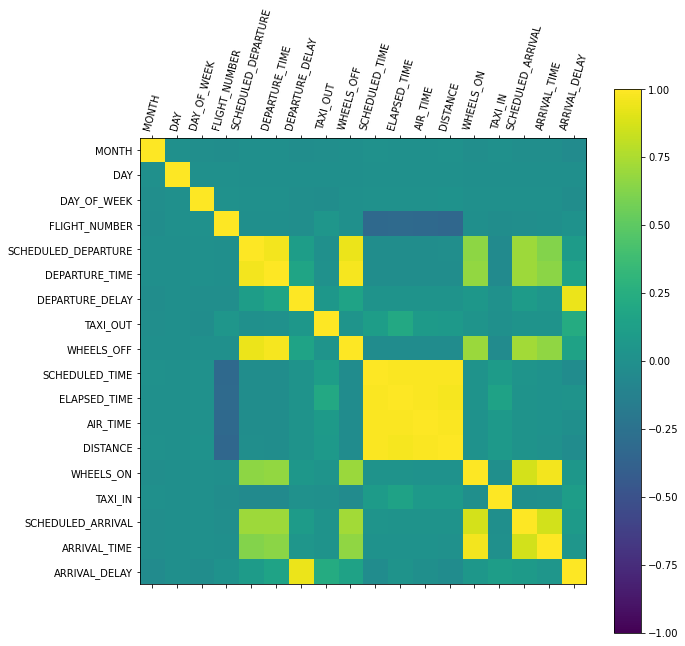

In [ ]:
correlation_matrix = df.corr() 
plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation_matrix, vmin=-1, vmax=1) 
fig.colorbar(cax)
ticks = np.arange(0,18,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks) 
ax.set_xticklabels(correlation_matrix.columns,rotation=75) 
ax.set_yticklabels(correlation_matrix.columns)
plt.show()

In [ ]:
correlated_features = set()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
# df.plot(kind='scatter', x=correlation_matrix.columns[i],␣ 􏰀→y=correlation_matrix.columns[j], title="Positive correlation");
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
#df.drop(labels=correlated_features, axis=1, inplace=True)
print(correlated_features)

{'ARRIVAL_DELAY', 'ARRIVAL_TIME', 'AIR_TIME', 'WHEELS_OFF', 'SCHEDULED_ARRIVAL', 'DISTANCE', 'ELAPSED_TIME', 'DEPARTURE_TIME'}


In [ ]:
df.drop(labels=correlated_features, axis=1, inplace=True)

In [ ]:
print(df.columns)

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'TAXI_OUT', 'SCHEDULED_TIME',
       'WHEELS_ON', 'TAXI_IN'],
      dtype='object')


In [ ]:
obj_df = df.select_dtypes(include=['object']).copy()
converted_df = df.copy(deep = True)
print(df.head())
df[obj_df.columns] = df[obj_df.columns].apply(lambda col:pd.Categorical(col).codes) 
print(df.head())

   MONTH  DAY  DAY_OF_WEEK  ... SCHEDULED_TIME  WHEELS_ON TAXI_IN
0      1    1            4  ...          205.0      404.0     4.0
1      1    1            4  ...          280.0      737.0     4.0
2      1    1            4  ...          286.0      800.0    11.0
3      1    1            4  ...          285.0      748.0     8.0
4      1    1            4  ...          235.0      254.0     5.0

[5 rows x 14 columns]
   MONTH  DAY  DAY_OF_WEEK  ...  SCHEDULED_TIME  WHEELS_ON  TAXI_IN
0      1    1            4  ...           205.0      404.0      4.0
1      1    1            4  ...           280.0      737.0      4.0
2      1    1            4  ...           286.0      800.0     11.0
3      1    1            4  ...           285.0      748.0      8.0
4      1    1            4  ...           235.0      254.0      5.0

[5 rows x 14 columns]


In [ ]:
df.describe()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,WHEELS_ON,TAXI_IN
count,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06
mean,6.547799e+00,1.570759e+01,3.932643e+00,6.754759e+00,2.164384e+03,2.565113e+03,7.171699e+02,7.172039e+02,1.328907e+03,9.294842e+00,1.606550e+01,1.418940e+02,1.471319e+03,7.429063e+00
std,3.397421e+00,8.774394e+00,1.985967e+00,4.640073e+00,1.754706e+03,1.428935e+03,1.891715e+02,1.891763e+02,4.835251e+02,3.688972e+01,8.882449e+00,7.531400e+01,5.218682e+02,5.618951e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.800000e+01,1.000000e+00,1.000000e+00
25%,4.000000e+00,8.000000e+00,2.000000e+00,3.000000e+00,7.280000e+02,1.387000e+03,6.730000e+02,6.730000e+02,9.160000e+02,-5.000000e+00,1.100000e+01,8.500000e+01,1.054000e+03,4.000000e+00
50%,7.000000e+00,1.600000e+01,4.000000e+00,7.000000e+00,1.681000e+03,2.585000e+03,7.690000e+02,7.690000e+02,1.325000e+03,-2.000000e+00,1.400000e+01,1.230000e+02,1.508000e+03,6.000000e+00
75%,9.000000e+00,2.300000e+01,6.000000e+00,1.100000e+01,3.211000e+03,3.862000e+03,8.350000e+02,8.350000e+02,1.730000e+03,7.000000e+00,1.900000e+01,1.740000e+02,1.911000e+03,9.000000e+00
max,1.200000e+01,3.100000e+01,7.000000e+00,1.300000e+01,9.320000e+03,4.895000e+03,9.280000e+02,9.280000e+02,2.359000e+03,1.988000e+03,2.250000e+02,7.180000e+02,2.400000e+03,2.480000e+02


In [ ]:
mmm = df["DEPARTURE_DELAY"].median()
df['RESULT']=df['DEPARTURE_DELAY'].apply(lambda x: 1 if x > mmm else 0)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score 
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
# Splitting data
x = df.drop(["RESULT"],1)
y = df["RESULT"]
print(y.value_counts())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)
print(y_test.value_counts())
print(y_train.value_counts())
# Initializing model
model = DecisionTreeClassifier()
b_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)


0    2884004
1    2830004
Name: RESULT, dtype: int64
0    865349
1    848854
Name: RESULT, dtype: int64
0    2018655
1    1981150
Name: RESULT, dtype: int64


The accuracy obtained through Decision Tree Classifier is 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    865349
           1       1.00      1.00      1.00    848854

    accuracy                           1.00   1714203
   macro avg       1.00      1.00      1.00   1714203
weighted avg       1.00      1.00      1.00   1714203



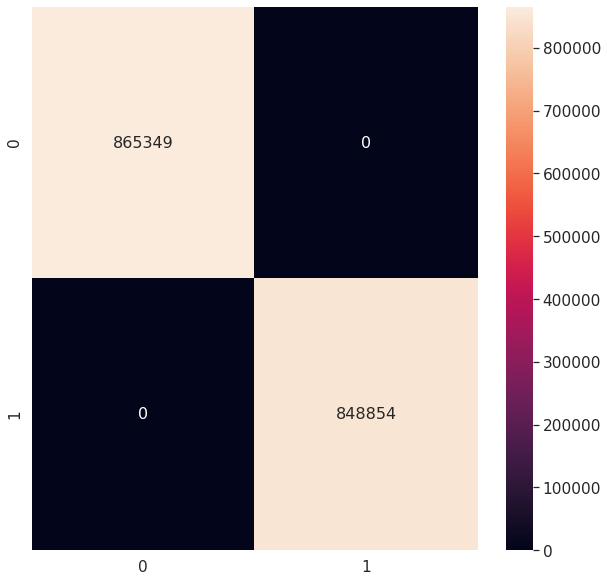

In [ ]:
model.fit(x_train, y_train) # Predicting for test data
y_pred = model.predict(x_test)
# Accuracy of the model
accuracy_decisiontree = accuracy_score(y_test, y_pred)
print("The accuracy obtained through Decision Tree Classifier is", accuracy_decisiontree);
# Other metrics
print(classification_report(y_test, y_pred)) 
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, range(2), range(2)) 
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt="d")

In [1]:
# spark-related dependencies
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.osuosl.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz

!pip install -q findspark
!pip install pyspark

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [56.8 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:13 http://ppa.launchpad.net/cran/

In [7]:
# set up required environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [3]:
# point colaboratory to your google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
# spark context
from pyspark.context import SparkContext
sparkContext = SparkContext('local')

In [ ]:
# stop running spark context
sparkContext.stop()

In [9]:
# spark session
from pyspark.sql import SparkSession
sparkSession = SparkSession.builder.master("local").appName("ASBD").getOrCreate()

In [11]:
# sql context
from pyspark.sql import SQLContext
sqlContext = SQLContext(sparkContext)

In [69]:
# tools needed to connect to the spark server and process
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer, VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import isnan, when, count, col, sum, mean, avg

# Set up constants
CSV_flights = "/content/gdrive/MyDrive/ASBD/Project_Dataset/flights.csv" 
CSV_airports = "/content/gdrive/MyDrive/ASBD/Project_Dataset/airports.csv"
CSV_airlines = "/content/gdrive/MyDrive/ASBD/Project_Dataset/airlines.csv"
APP_NAME = "Flight Delays Analysis and Prediction"
SPARK_URL = "local[*]"
RANDOM_SEED = 141109
TRAINING_DATA_RATIO = 0.7
RF_NUM_TREES = 8
RF_MAX_DEPTH = 4
RF_NUM_BINS = 32

In [13]:
# connect to the Spark server
spark = SparkSession.builder.appName(APP_NAME).master(SPARK_URL).getOrCreate()

# load datasets into spark dataframe
data_flights = spark.read.options(header="true", inferschema = "true").csv(CSV_flights)
data_airports = spark.read.options(header="true", inferschema = "true").csv(CSV_airports)
data_airlines = spark.read.options(header="true", inferschema = "true").csv(CSV_airlines)

In [14]:
print(f"The shape of flights dataset is {data_flights.count():d} rows by {len(data_flights.columns):d} columns.")
print(f"The shape of airports dataset is {data_airports.count():d} rows by {len(data_airports.columns):d} columns.")
print(f"The shape of airlines dataset is {data_airlines.count():d} rows by {len(data_airlines.columns):d} columns.")

The shape of flights dataset is 5819079 rows by 31 columns.
The shape of airports dataset is 322 rows by 7 columns.
The shape of airlines dataset is 14 rows by 2 columns.


In [24]:
# removing unused columns
data_flights = data_flights.drop('YEAR', 'FLIGHT_NUMBER', 'AIRLINE', 'DISTANCE', 'TAIL_NUMBER', 'TAXI_OUT', 'SCHEDULED_TIME', 'DEPARTURE_TIME', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'WHEELS_OFF', 'ELAPSED_TIME', 'AIR_TIME', 'WHEELS_ON', 'DAY_OF_WEEK', 'TAXI_IN', 'CANCELLATION_REASON')

In [40]:
data_flights = data_flights.withColumn("DELAYED", data_flights["ARRIVAL_DELAY"])

In [53]:
# compute whether the flight journey is delayed or on time based on the threshold
data_flights = data_flights.withColumn('DELAYED', when(data_flights["DELAYED"]>15, 1).otherwise(0))

In [77]:
def fill_with_mean(dataframe, exclude=set()): 
    stats = dataframe.agg(*(avg(c).alias(c) for c in dataframe.columns if c not in exclude))
    return dataframe.na.fill(stats.first().asDict())

data_flights = fill_with_mean(data_flights)
# data_flights.show()

In [78]:
feature_cols = ["MONTH", "DAY", "SCHEDULED_DEPARTURE", "DEPARTURE_DELAY", "SCHEDULED_ARRIVAL", "ARRIVAL_TIME", "ARRIVAL_DELAY", "DIVERTED", "CANCELLED", "AIR_SYSTEM_DELAY", "SECURITY_DELAY", "AIRLINE_DELAY", "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"]

In [79]:
data_flights = VectorAssembler(inputCols=feature_cols, outputCol="FEATURES").transform(data_flights)

In [81]:
data_flights.select("DELAYED", "FEATURES").show(5)

+-------+--------------------+
|DELAYED|            FEATURES|
+-------+--------------------+
|      0|[1.0,1.0,5.0,-11....|
|      0|[1.0,1.0,10.0,-8....|
|      0|[1.0,1.0,20.0,-2....|
|      0|[1.0,1.0,20.0,-5....|
|      0|[1.0,1.0,25.0,-1....|
+-------+--------------------+
only showing top 5 rows



In [83]:
# generate a labelIndexer
labelIndexer = StringIndexer(inputCol="DELAYED", outputCol="indexedLabel").fit(data_flights)

# generate the indexed feature vector
featureIndexer = VectorIndexer(inputCol="FEATURES", outputCol="indexedFeatures", maxCategories=4).fit(data_flights)
    
# split the data into training and tests sets
(trainingData, testData) = data_flights.randomSplit([TRAINING_DATA_RATIO, 1 - TRAINING_DATA_RATIO])

# train the RandomForest model
random_forest = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures", numTrees=RF_NUM_TREES)

# chain indexers and the forest models in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, random_forest])

In [84]:
# train model
model = pipeline.fit(trainingData)
# predictions
predictions = model.transform(testData)

In [85]:
evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Test Error = {(1.0 - accuracy):g}")
print(f"Accuracy   = {accuracy:g}") 

Test Error = 0
Accuracy   = 1
